In [1]:
import datetime
import numpy as np
import xarray as xr
from oceantide import read_otis

%matplotlib inline

# Oceantide
## Tide prediction library

* Same approach as in wavespectra with xarray accessor
* Reading functions format dataset into oceantide format
* `tide` namespace attached to dataset with predict method


## Original dataset in Otis format

* Arakawa grid
* Individual variables for real and imag components


In [2]:
dset_original = xr.open_zarr("../tests/test_files/test_cons_otis.zarr/", consolidated=True)
dset_original

<xarray.Dataset>
Dimensions:  (con: 3, lat_u: 19, lat_v: 19, lat_z: 19, lon_u: 34, lon_v: 34, lon_z: 34)
Coordinates:
  * con      (con) |S4 b'm2  ' b's2  ' b'n2  '
  * lat_u    (lat_u) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lat_v    (lat_v) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lat_z    (lat_z) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lon_u    (lon_u) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
  * lon_v    (lon_v) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
  * lon_z    (lon_z) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
Data variables:
    UIm      (con, lat_u, lon_u) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    URe      (con, lat_u, lon_u) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    VIm      (con, lat_v, lon_v) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    VRe      (con, lat_v, lon_v) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    hIm      (con, lat_z, lon_z) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    hRe      (con, lat_z, lon_z) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    hu       (lat_u, lon_u) float32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    hv       (lat_v, lon_v) float32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    hz       (lat_z, lon_z) float32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    mu       (lat_u, lon_u) int32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    mv       (lat_v, lon_v) int32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    mz       (lat_z, lon_z) int32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    uIm      (con, lat_u, lon_u) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    uRe      (con, lat_u, lon_u) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    vIm      (con, lat_v, lon_v) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    vRe      (con, lat_v, lon_v) float32 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
Attributes:
    description:  Tidal constituents in OTIS format
    institution:  Oceanum Ltd

## Dataset formatted into oceantide format

* Common grid at cell centre
* Single complex variables for elevation and velocities


In [3]:
dset = read_otis("../tests/test_files/test_cons_otis.zarr/", file_format="zarr")
dset

<xarray.Dataset>
Dimensions:  (con: 3, lat: 19, lon: 34)
Coordinates:
  * con      (con) <U2 'M2' 'S2' 'N2'
  * lat      (lat) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lon      (lon) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
Data variables:
    depth    (lat, lon) float32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    mask     (lat, lon) int32 dask.array<chunksize=(19, 34), meta=np.ndarray>
    et       (con, lat, lon) complex64 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    ut       (con, lat, lon) complex64 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
    vt       (con, lat, lon) complex64 dask.array<chunksize=(3, 19, 34), meta=np.ndarray>
Attributes:
    description:  Tide constituents

## The `tide` accessor

In [4]:
dset.tide

<Tide>
Dimensions:  (con: 3, lat: 19, lon: 34)
Coordinates:
  * con      (con) <U2 'M2' 'S2' 'N2'
  * lat      (lat) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lon      (lon) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
Data variables:
    depth    (lat, lon) float32 dask.array<Tide>
    mask     (lat, lon) int32 dask.array<Tide>
    et       (con, lat, lon) complex64 dask.array<Tide>
    ut       (con, lat, lon) complex64 dask.array<Tide>
    vt       (con, lat, lon) complex64 dask.array<Tide>
Attributes:
    description:  Tide constituents

## Tide prediction

In [5]:
times = [datetime.datetime(2001, 1, 1, H) for H in np.arange(0, 24, 3)]
ds = dset.tide.predict(times=times, time_chunk=24)
ds

<xarray.Dataset>
Dimensions:  (lat: 19, lon: 34, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-01T21:00:00
  * lat      (lat) float64 47.88 48.63 49.38 50.13 ... 59.17 59.92 60.67 61.42
  * lon      (lon) float64 -11.62 -10.87 -10.12 -9.375 ... 11.63 12.38 13.13
Data variables:
    et       (time, lat, lon) float64 dask.array<chunksize=(8, 19, 34), meta=np.ndarray>
    ut       (time, lat, lon) float64 dask.array<chunksize=(8, 19, 34), meta=np.ndarray>
    vt       (time, lat, lon) float64 dask.array<chunksize=(8, 19, 34), meta=np.ndarray>
Attributes:
    description:  Tide elevation and currents prediction time series
    institution:  Oceanum Ltd

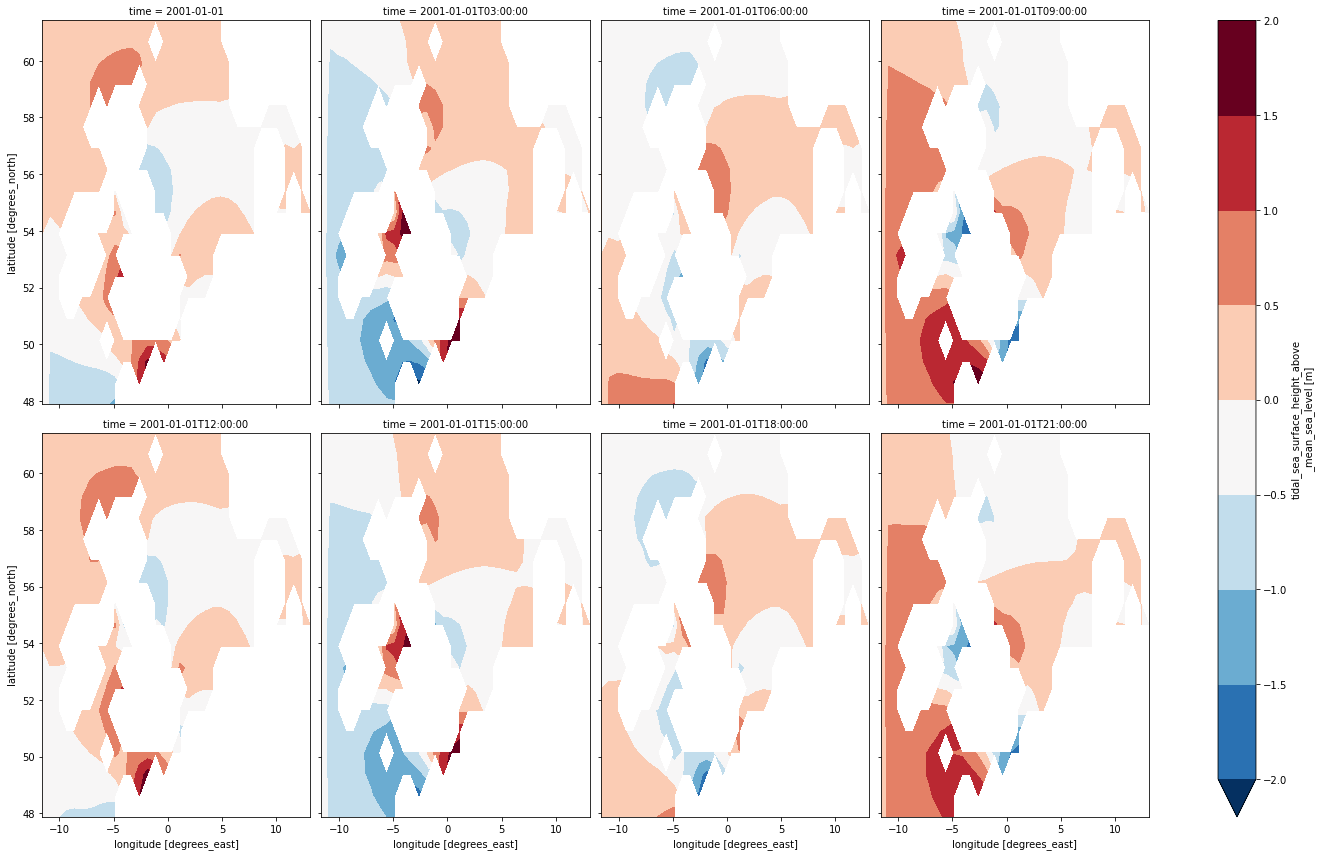

In [6]:
ds.et.plot.contourf(
    col="time",
    col_wrap=4,
    cmap="RdBu_r",
    levels=np.arange(-2, 2.5, 0.5),
    figsize=(20, 12),
)

In [7]:
ds.to_netcdf("/tmp/eta.nc")
!ncdump -h /tmp/eta.nc

netcdf eta {
dimensions:
	time = 8 ;
	lat = 19 ;
	lon = 34 ;
variables:
	int64 time(time) ;
		time:units = "hours since 2001-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	double lat(lat) ;
		lat:_FillValue = NaN ;
		lat:standard_name = "latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:_FillValue = NaN ;
		lon:standard_name = "longitude" ;
		lon:units = "degrees_east" ;
	double et(time, lat, lon) ;
		et:_FillValue = NaN ;
		et:standard_name = "tidal_sea_surface_height_above_mean_sea_level" ;
		et:units = "m" ;
	double ut(time, lat, lon) ;
		ut:_FillValue = NaN ;
		ut:standard_name = "eastward_sea_water_velocity_due_to_tides" ;
		ut:units = "m s-1" ;
	double vt(time, lat, lon) ;
		vt:_FillValue = NaN ;
		vt:standard_name = "northward_sea_water_velocity_due_to_tides" ;
		vt:units = "m s-1" ;

// global attributes:
		:description = "Tide elevation and currents prediction time series" ;
		:institution = "Oceanum Ltd" ;
}
